Kulle Omer <p>
Phase 3 Project <p>
Self-Paced <p>

### Obtain Data

In [1]:
#importing all libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, multivariate_normal
import sklearn
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn import tree
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [2]:
df = pd.read_csv("file:///Users/kulleomer/Downloads/bigml_59c28831336c6604c800002a.csv")

#### Data Cleaning 

In [3]:
df.info() #creating dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.head() #taking a look at it

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.isna().sum() #looking for null values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df['churn'] = df['churn'].astype(int) #changing churn values to 0/1
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Exploratory Data

In [7]:
df['churn'].value_counts() #looking at churn values

0    2850
1     483
Name: churn, dtype: int64

In [8]:
Percent_churn = 483/(2850+483)
print(Percent_churn) #percentage of customers churning

0.14491449144914492


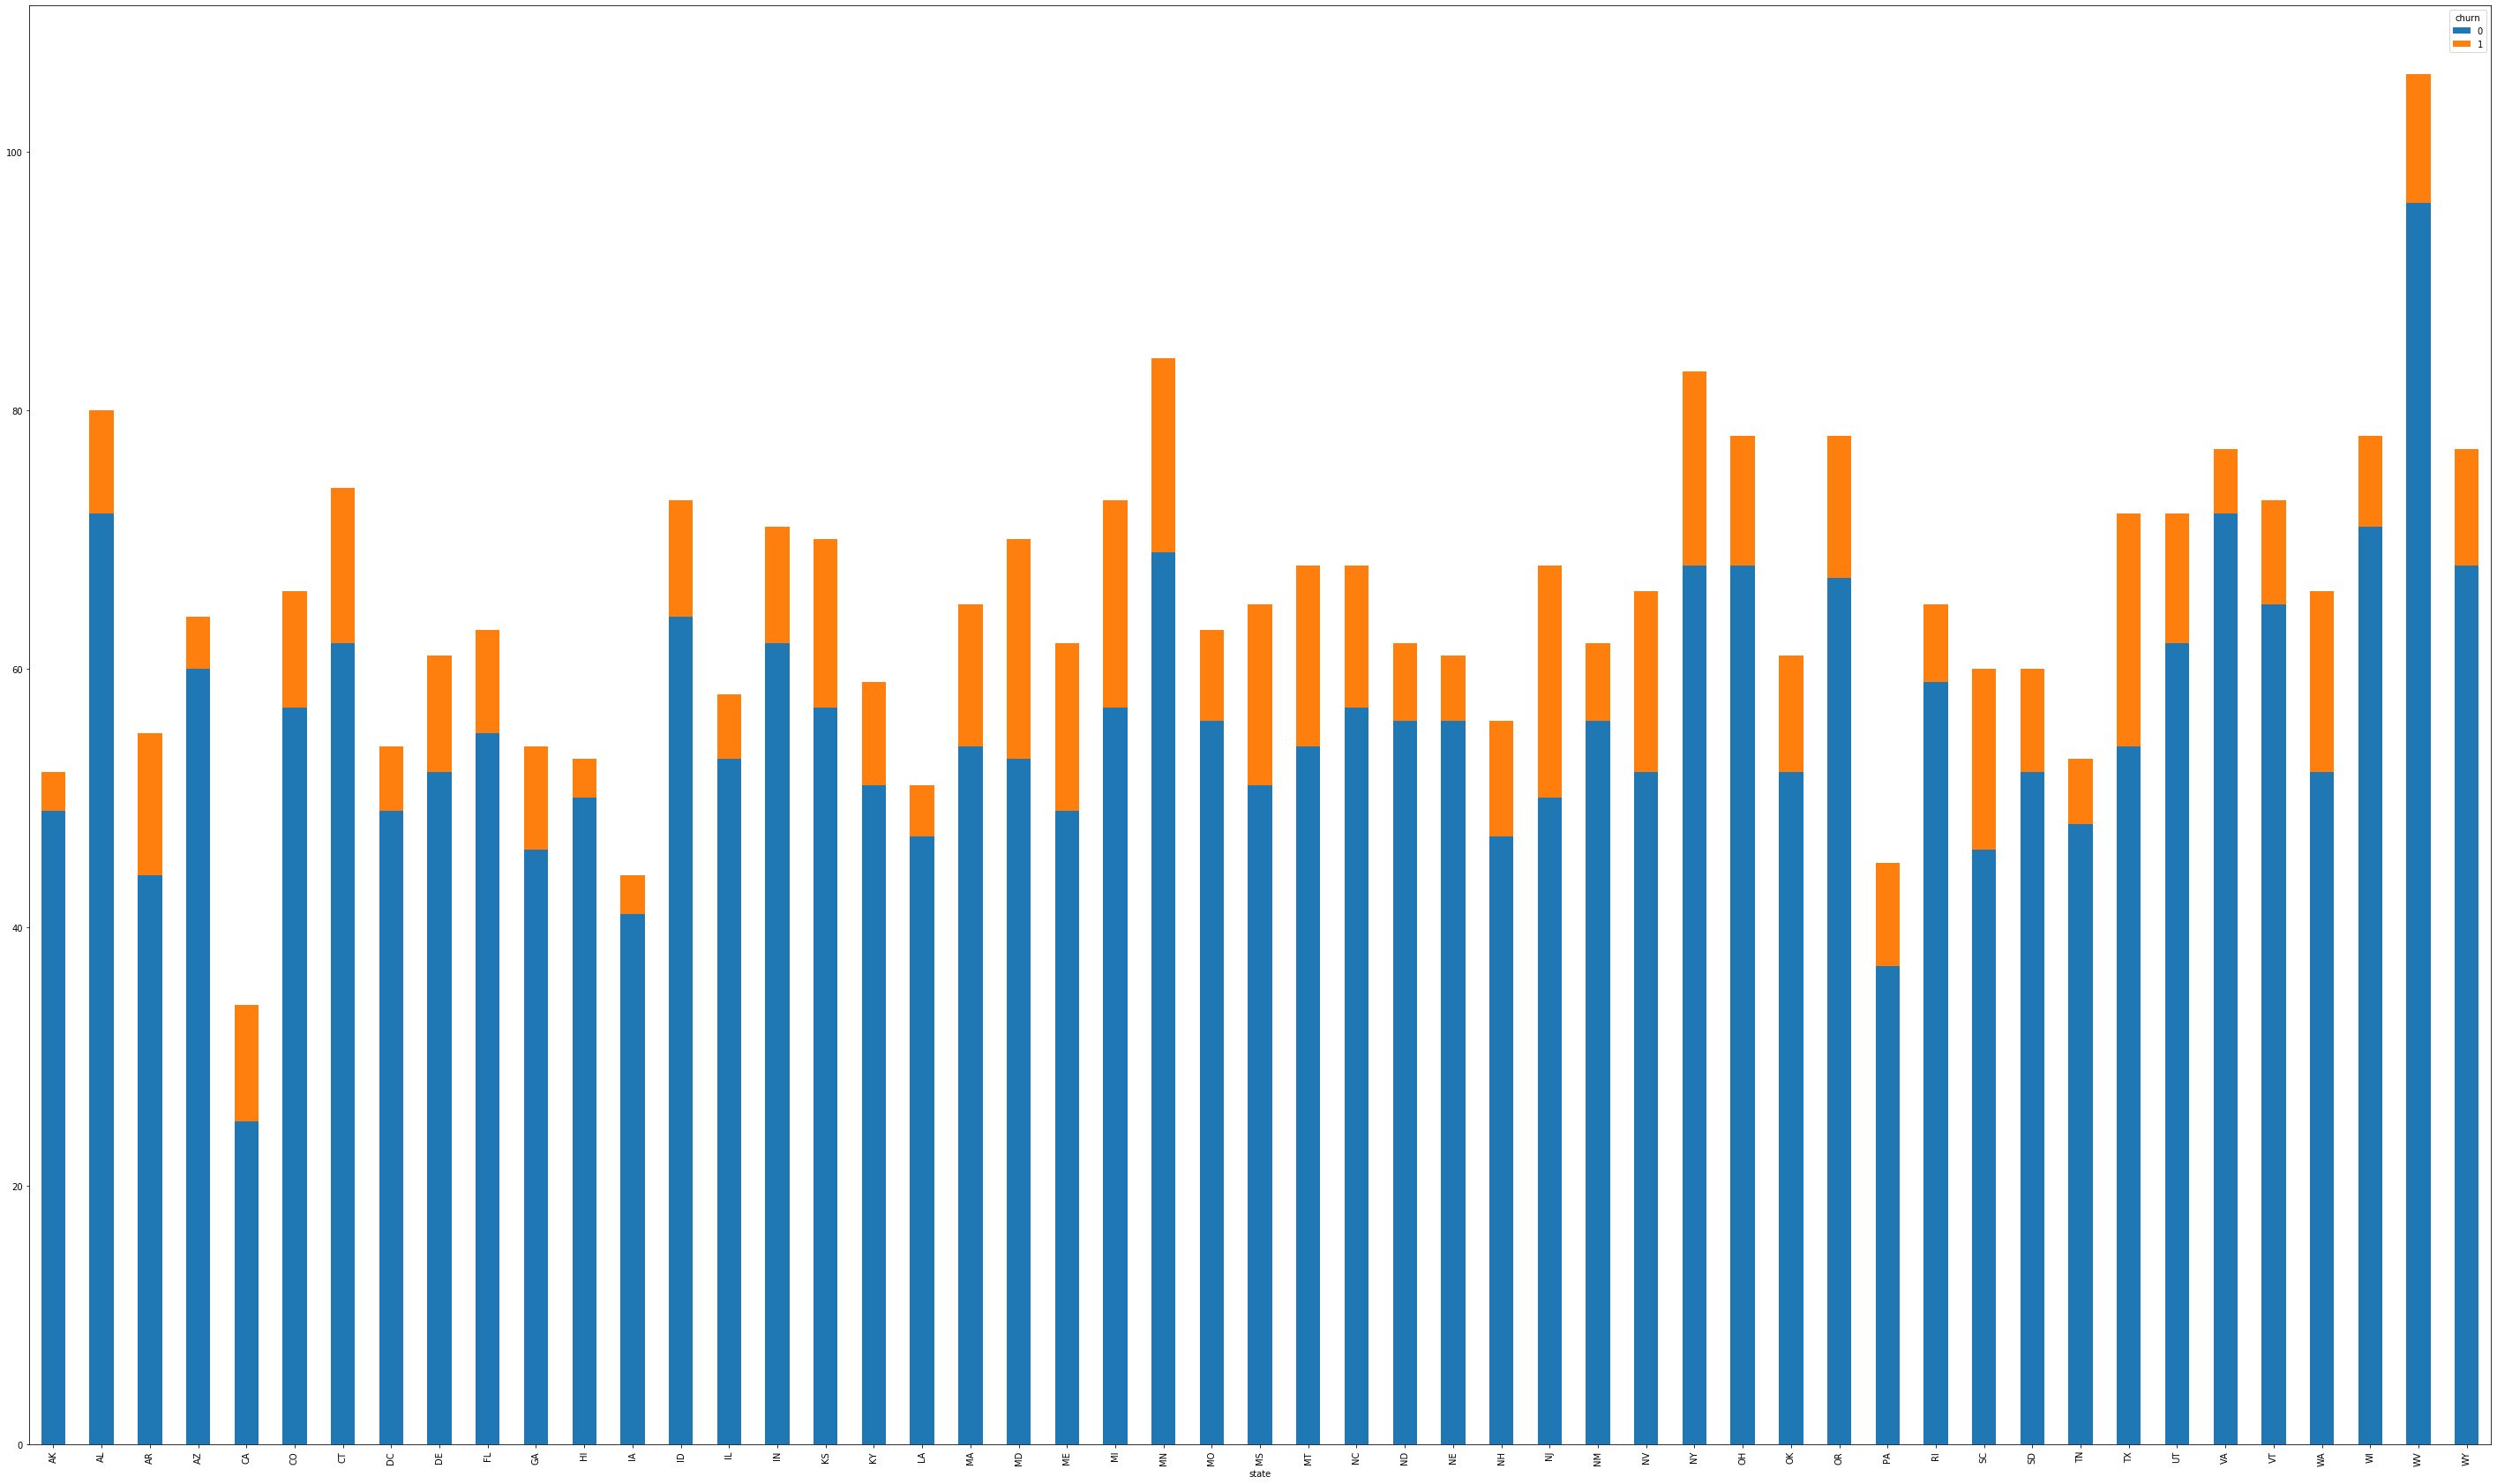

In [9]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(50,30))

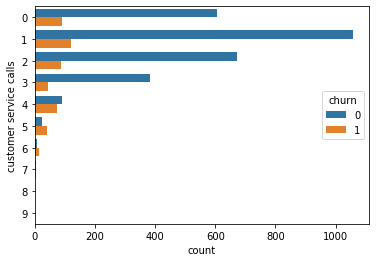

In [10]:
sns.countplot(y='customer service calls', hue='churn', data=df)

State with the minimum amount of calls:
state
CA    10431
Name: all calls, dtype: int64
State with the maximum amount of calls:
state
WV    32055
Name: all calls, dtype: int64


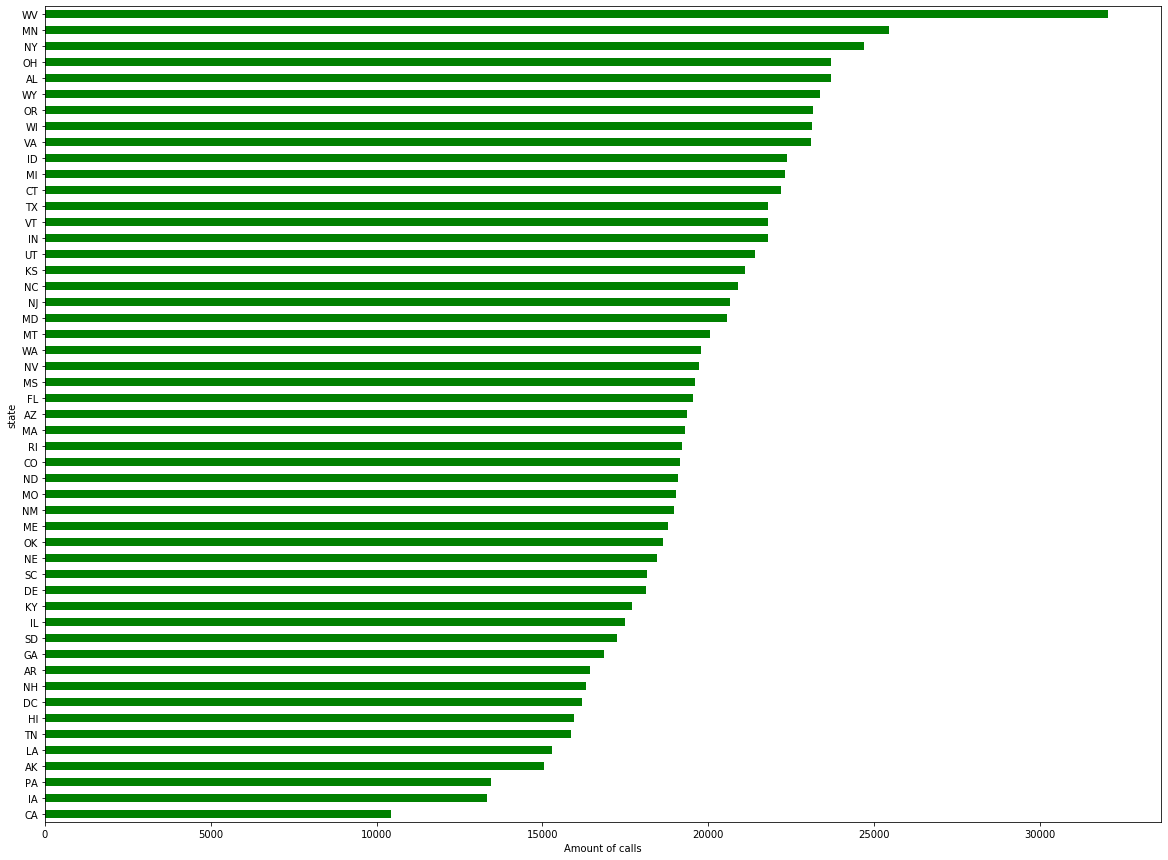

In [11]:
df['all calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
state_calls = df.groupby('state')['all calls'].sum().sort_values()
print('State with the minimum amount of calls:\n', state_calls[state_calls == state_calls[0]], sep='')
print('State with the maximum amount of calls:\n', state_calls[state_calls == state_calls[-1]], sep='')
plt.xlabel('Amount of calls')
plt.ylabel('State')
state_calls.plot(kind='barh', x='Amount of calls', y='State', figsize=(20, 15), colormap='ocean')

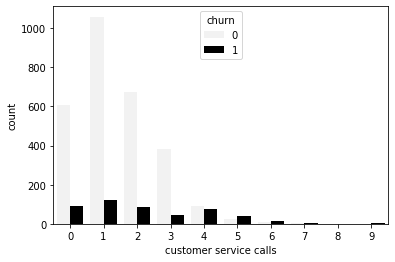

In [12]:
sns.countplot(x='customer service calls', hue='churn', data=df, color = 'black')

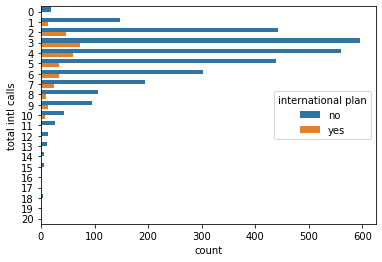

In [13]:
sns.countplot(y='total intl calls', hue='international plan', data=df)

#### Preparing for modeling

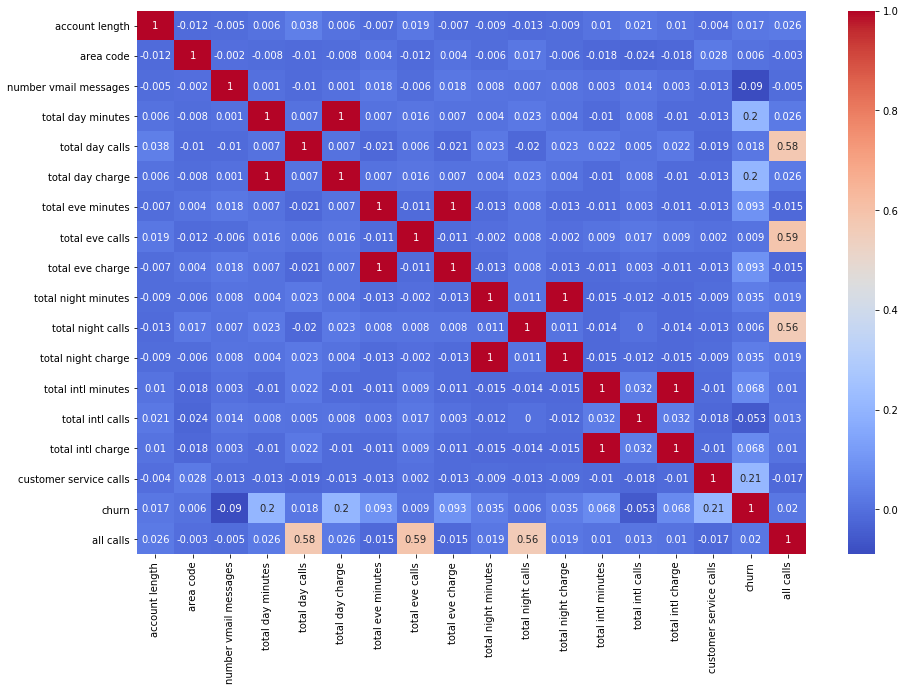

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,all calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.026157
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.003119
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.004925
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.026193
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.577225
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.026195
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,-0.014850
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.588530
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,-0.014839
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,0.018582


In [14]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()
df.corr()
#analyzing correlating values

The features that have good correlation with churn are total day charge, customer service calls, total day charge/day plan. We will find out more using machine learning methods.

In [15]:
df = df.drop(['area code', 'state', 'phone number'], axis=1) 
#these features are causing noise 
#I don't think they are necessary so i will drop them

In [16]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,all calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,300
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,329
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,328
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,248
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,356


In [17]:
#test/train split
X = df.drop(columns=['churn'], axis=1) # features
y = df['churn']  # target vector
print(f'X shape:  {X.shape}')
print(f'y shape:  {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=87)

print(f'X_train shape:  {X_train.shape}')
print(f'y_train shape:  {y_train.shape}')

print(f'X_test shape:  {X_test.shape}')
print(f'y_test shape:  {y_test.shape}')

X shape:  (3333, 18)
y shape:  (3333,)
X_train shape:  (2666, 18)
y_train shape:  (2666,)
X_test shape:  (667, 18)
y_test shape:  (667,)


In [18]:
ohe_division = X_train.iloc[:,:19] #using one hot encoder to each column

In [19]:
X_train = ohe_division.apply(LabelEncoder().fit_transform) 

In [20]:
scale_vars = ['account length', 
              'number vmail messages', 
              'total day minutes', 
              'total day calls', 
              'total day charge', 
              'total eve minutes',  
              'total eve calls', 
              'total eve charge',
              'total night minutes',
              'total night calls', 
              'total night charge',
              'total intl minutes',
              'total intl calls',
              'total intl charge', 
              'customer service calls'
             ]
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_train.head()
#scaling data to avoid big numbers

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,all calls
306,0.526570,0,0,0.000000,0.928523,0.608696,0.928523,0.863165,0.663717,0.854950,0.574216,0.534483,0.556933,0.389937,0.50,0.389937,0.111111,129
832,0.400966,0,0,0.000000,0.993257,0.565217,0.993257,0.512094,0.442478,0.511128,0.409756,0.732759,0.422773,0.446541,0.20,0.446541,0.222222,122
1355,0.222222,0,1,0.568182,0.982468,0.452174,0.982468,0.721493,0.672566,0.713738,0.455749,0.517241,0.461105,0.710692,0.70,0.710692,0.333333,110
1600,0.536232,0,1,0.454545,0.364127,0.600000,0.364127,0.669661,0.796460,0.663853,0.833449,0.491379,0.792559,0.138365,0.20,0.138365,0.000000,138
726,0.376812,0,0,0.000000,0.300742,0.652174,0.300742,0.314444,0.495575,0.320798,0.933101,0.448276,0.904171,0.345912,0.25,0.345912,0.111111,105


In [21]:
ohe_division_X_test = X_test.iloc[:,:19] #ohe to encode categorical data to numerical

In [22]:
X_test = ohe_division_X_test.apply(LabelEncoder().fit_transform) #applying this to test data

In [23]:
scale_vars = ['account length', 
              'number vmail messages', 
              'total day minutes', 
              'total day calls', 
              'total day charge', 
              'total eve minutes',  
              'total eve calls', 
              'total eve charge',
              'total night minutes',
              'total night calls', 
              'total night charge',
              'total intl minutes',
              'total intl calls',
              'total intl charge', 
              'customer service calls'
             ]
scaler = MinMaxScaler()
X_test[scale_vars] = scaler.fit_transform(X_test[scale_vars])
X_test.head()
#scaling test data to avoid big numbers

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,all calls
764,0.600000,0,1,0.513514,0.318966,0.309278,0.318966,0.640794,0.452830,0.632075,0.741410,0.226804,0.738462,0.609375,0.2500,0.609375,0.000000,30
2231,0.282353,0,1,0.567568,0.048276,0.525773,0.048276,0.041516,0.433962,0.043396,0.291139,0.546392,0.320879,0.273438,0.5625,0.273438,0.428571,79
873,0.823529,0,0,0.000000,0.406897,0.577320,0.406897,0.740072,0.650943,0.735849,0.987342,0.237113,0.984615,0.445312,0.0625,0.445312,0.142857,77
3022,0.617647,0,1,0.567568,0.284483,0.350515,0.284483,0.059567,0.113208,0.062264,0.652803,0.463918,0.652747,0.023438,0.4375,0.023438,0.000000,20
1363,0.582353,0,1,0.513514,0.082759,0.639175,0.082759,0.754513,0.726415,0.750943,0.909584,0.515464,0.896703,0.320312,0.3750,0.320312,0.428571,118


#### Decision Tree

In [24]:
#decision tree 
dec_tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=6, 
                                  random_state=1)
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

In [25]:
#looking at values from confusion matrix
print(confusion_matrix(y_test, dec_tree.predict(X_test)))
print(classification_report(y_test, dec_tree.predict(X_test)))

[[523  47]
 [ 23  74]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       570
           1       0.61      0.76      0.68        97

    accuracy                           0.90       667
   macro avg       0.78      0.84      0.81       667
weighted avg       0.91      0.90      0.90       667



Our first decision tree model gave us a recall of 76%, which means that our model is 76 % accurate in correctly identifying true positives.   

#### Random Forest

In [26]:
#ensemble method 
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

In [27]:
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

[[530  40]
 [ 20  77]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       570
           1       0.66      0.79      0.72        97

    accuracy                           0.91       667
   macro avg       0.81      0.86      0.83       667
weighted avg       0.92      0.91      0.91       667



An 81% recall (true positives) using Random forest

#### Random Forest with GridSearch

In [28]:
#hyperparameter tuning to get the best values
# GridSearchCV goes through, every parameter we provide and finds the 
# best combination that give the best accuracy.
rf = RandomForestClassifier(random_state=101)

params = {
    'max_features': [1, 'sqrt', 'log2'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['entropy', 'gini']
}

grid = GridSearchCV(estimator= rf, param_grid=params, verbose=1)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [1, 'sqrt', 'log2']},
             verbose=1)

In [30]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}

In [31]:
rf_best = grid.best_estimator_


In [32]:
print(confusion_matrix(y_test, rf_best.predict(X_test)))
print(classification_report(y_test, rf_best.predict(X_test)))

[[533  37]
 [ 21  76]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.67      0.78      0.72        97

    accuracy                           0.91       667
   macro avg       0.82      0.86      0.84       667
weighted avg       0.92      0.91      0.92       667



We got a 78% recall for the first rf model, and an accuracy of 91%

#### DT w/SMOTE

In [33]:
X = X_train  # features
y = y_train  # churn
print('X shape:  {}'.format(np.shape(X)))
print('y shape:  {}'.format(np.shape(y)))


X shape:  (2666, 18)
y shape:  (2666,)


In [34]:
smote = SMOTE(random_state=12)

X_train_smote, y_train_smote = smote.fit_resample(X, y)

print(f'X_train_smote shape:  {X_train_smote.shape}')
print(f'y_train_smote shape:  {y_train_smote.shape}')

X_train_smote shape:  (4560, 18)
y_train_smote shape:  (4560,)


In [35]:
dec_tree_smote = DecisionTreeClassifier(criterion='entropy', 
                                        max_depth=6, 
                                        random_state=1)
dec_tree_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

In [36]:
print(confusion_matrix(y_test, dec_tree_smote.predict(X_test)))
print(classification_report(y_test, dec_tree_smote.predict(X_test)))

[[293 277]
 [ 12  85]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       570
           1       0.23      0.88      0.37        97

    accuracy                           0.57       667
   macro avg       0.60      0.70      0.52       667
weighted avg       0.86      0.57      0.63       667



Our recall (true positives) increased to 88% by using SMOTE.

#### RF w/SMOTE

In [37]:
rf_grid = GridSearchCV(estimator= RandomForestClassifier(),
                       param_grid=params, scoring='recall')
# i am using gridsearch along with smote to reduce class imbalance
# SMOTE duplicates those minority features to ensure theres a balance

In [38]:
rf_grid.fit(X_train_smote, y_train_smote)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [1, 'sqrt', 'log2']},
             scoring='recall')

In [39]:
rf_grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2'}

In [40]:
print(confusion_matrix(y_test, rf_grid.predict(X_test)))
print(classification_report(y_test, rf_grid.predict(X_test)))

[[413 157]
 [ 20  77]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       570
           1       0.33      0.79      0.47        97

    accuracy                           0.73       667
   macro avg       0.64      0.76      0.64       667
weighted avg       0.86      0.73      0.77       667



We got a better recall with the decision tree using smote, and about the same with random forest.

#### Final Model

In [41]:
for i, column in enumerate(X_train_smote):
    print('Importance of feature {}:, {:.3f}'
          .format(column, dec_tree_smote.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column],
                       'Feature Importance Score': 
                       [dec_tree_smote.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi
        #calculating fi with our best model

Importance of feature account length:, 0.005
Importance of feature international plan:, 0.049
Importance of feature voice mail plan:, 0.069
Importance of feature number vmail messages:, 0.002
Importance of feature total day minutes:, 0.204
Importance of feature total day calls:, 0.008
Importance of feature total day charge:, 0.012
Importance of feature total eve minutes:, 0.058
Importance of feature total eve calls:, 0.000
Importance of feature total eve charge:, 0.002
Importance of feature total night minutes:, 0.031
Importance of feature total night calls:, 0.003
Importance of feature total night charge:, 0.000
Importance of feature total intl minutes:, 0.034
Importance of feature total intl calls:, 0.037
Importance of feature total intl charge:, 0.004
Importance of feature customer service calls:, 0.474
Importance of feature all calls:, 0.010


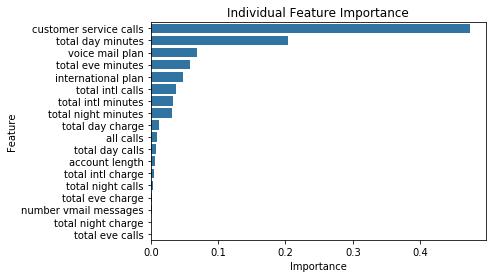

In [42]:
# final fi to finalize project
FI_df = pd.DataFrame(
    list(zip(X_train_smote.columns, 
             dec_tree_smote.feature_importances_)),
    columns=['Feature', 'Importance']
)

FI_df.sort_values('Importance', inplace=True, ascending=False)


sns.barplot(x = 'Importance', y = 'Feature', data = FI_df, color = 'tab:blue').set_title('Individual Feature Importance')
plt.savefig('Final Feature Importance')

Based on our findings, customer service call is the main reason why customers churn. A recommendation in fixing this issue is training customer service employees to deal with customers problems more delicately, and use statistics from monitioring call in order to be able to deal with employees better. With total day minutes, and voice mail plan come in as the second and third reasons, we recommend for SyriaTel to work on a more affordable/reasonable costs for their plan in order to encourage customer retention. In addition, they should also work on offering different plans to serve each customer, more customer satisfaction = less customer service calls and less amount of people churning.